In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## First : student-sample-1.py

###1- Code
 

In [0]:
import pandas as pd
import numpy as np
from sklearn import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
d = pd.read_csv('../data/train.csv')


# Setup data for prediction
x1 = data.SalaryNormalized
x2 = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')
print(scores.mean())

### Correction 

In [26]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression ### LinearRegression to be imported from sklearn.linear_model not directly from sklearn
from sklearn.model_selection import cross_val_score ,train_test_split ### both cross_val_score ,train_test_split to be imported from sklearn.model_selection not sklearn.cross_validation
### Note that it is not accurate to import train_test_split since it will not be needed later

### it is also better to import all required libraries in the beginning of the code 

# Load data
data = pd.read_csv('/content/drive/My Drive/part-2-data.train.csv') # naming data by 'd' not giving an error , but it is better to name it by a morre relative name to business requirements 


# Setup data for prediction
x1 = data.SalaryNormalized
x2 = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

model.fit(x2, x1)



# Evaluate model

scores = cross_val_score(model, x2, x1, cv=2, scoring='neg_mean_absolute_error' ) ### scoring option is 'neg_mean_absolute_error'not mean_absolute_error , he can know the correct option using : sklearn.metrics.SCORERS.keys() ,
## also cv=1 means that cross validation is useless , since here we need at least a fold of data to train model and another to test , with cv=2 we have that , so we train model at least 2 times each time we train on a class 
####and test on the other  to  ensure each class is (approximately) equally represented across each test fold (which are of course combined in a complementary way to form training folds).
print(scores.mean())

-11733.827883047157


###2- Methodology



####  student should have run some describtive statistics , feature engineering  about variables , to check if all variables are in correct data type , if they include missing values like below : 

In [0]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Id                    10000 non-null int64
Title                 9999 non-null object
FullDescription       10000 non-null object
LocationRaw           10000 non-null object
LocationNormalized    10000 non-null object
ContractType          3556 non-null object
ContractTime          4737 non-null object
Company               5951 non-null object
Category              10000 non-null object
SalaryRaw             10000 non-null object
SalaryNormalized      10000 non-null int64
SourceName            10000 non-null object
dtypes: int64(2), object(10)
memory usage: 937.6+ KB


In [0]:
d.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


In [0]:
 for i in d.columns : 
    if d.dtypes[i] == 'object' : 
      print('frequencies of ' + i )
      print (d[i].value_counts())
      print(' ')

frequencies of Title
Staff Nurse                                                   78
Home Manager                                                  61
Dental Nurse                                                  39
Deputy Manager                                                32
Project Manager                                               24
                                                              ..
Net Developer  London  Asset Management  3 Months              1
Perm RMN Clinical LeadNorth Shields****ph FT excellent opp     1
Staff Nurse Job Rugby                                          1
New Claims Handler                                             1
Nursing Home Manager Job Manchester                            1
Name: Title, Length: 8273, dtype: int64
 
frequencies of FullDescription
Would you like a rewarding career within the healthcare sector? Do you enjoy providing excellent service and caring for customers? Are you an individual who understands and listens to others?

#### from the above brief describtion , we have some notes 

#### 1 - we note that SalaryNormalized (our predicted variable) is  actually derived  from SalaryRaw so it would have made sense to take SalaryRaw as predicted variable and use any classification algorithm.

#### 2-here we have ContractType , ContractTime  include missing values that should be handled before modeling or we should exclude them from analysis

#### 3-also salary normalized ( our predicted variable) as mentioned in point 1  is actually derived  from SalaryRaw so it does not make sense to include SalaryRaw in analysis

#### 4- similarly LocationNormalized is derived from LocationRaw so wes should n't include both in analysis

#### 5- company name , and source name not seeming as effecting variable that affect salary , so we should not have included them in analysis

### Also another extremely dangerous point when we use cv=1 in  means that cross validation is almost useless (so it gives error)  , since here we need at least a fold of data to train model and another to test we do that to guarntee that mean response value is almost equal in all folds , the more sample we have , the more we achieve that , with cv=2 we have that , so we train model at least 2 times each time we train on a class 
### and test on the other  to  ensure each class is (approximately) equally represented across each test fold (which are of course combined in a complementary way to form training folds).



## 3-Conceptual Understanding

#### student should have validated  assumptions of linear regression , like normality of the dependent variable , let's check it below : 

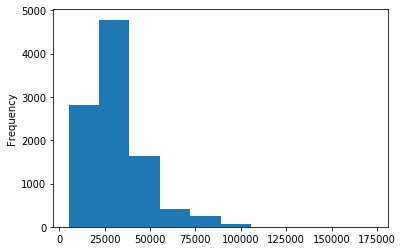

In [0]:
d['SalaryNormalized'].plot(kind='hist')

### Here we have some points about conceptual understanding

#### 1-so here it has skewness to the right , so we may need a transformation like log transformation for example 

#### 2-also in this case since all our independent variables are categorical we cans simply use ANOVA

#### 3-Here also other models like randomforest regressors are considerable variants 

#### 4 - it may have been better , since SalaryNormalized (our predicted variable) is  actually derived  from SalaryRaw so it would have made sense to take SalaryRaw as predicted variable and use any classification algorithm.

#### 5 - the point "cv=1" in cross_val_score reflects unawareness of k-fold cross validation concept




## Second : student-sample-2.py

###1- Code


In [0]:
#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
data = pd.read_csv('../data/train.csv')


# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
print(scores.mean())

### Correction 

In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score # cross_val_score imported from sklearn.model_selection not sklearn.cross_validation

# Load data
data = pd.read_csv('/content/drive/My Drive/part-2-data.train.csv')


# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error') # scoring option is 'neg_mean_absolute_error'not mean_absolute_error , he can know the correct option using : sklearn.metrics.SCORERS.keys() 
print(scores.mean())

-11822.140231295069


###2- Methodology


#### Exactly same as student 1



 

#### Except here student avoided the error of having cv=1 

## 3-Conceptual Understanding

#### Exactly same as student 1